In [15]:
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.operator.mutation import NonUniformMutation, UniformMutation, SimpleRandomMutation
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from modnsgaii import S_NSGAII, NSGAII

from jmetal.problem import ZDT1

from surrogate_models.regressor_chain_surrogate import RegressorChainSurrogate
from surrogate_models.multioutput_learning_surrogate import MultiOutputLearnerSurrogate
from surrogate_models.iSOUPTreeRegressor_surrogate import iSOUPTreeRegressorSurrogate
from surrogate_models.LSTM_surrogate import LSTMSurrogate

problem = ZDT1()

max_evaluations = 50000
#probability = 1.0 / problem.number_of_variables()
probability = 0.95
algorithm = S_NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=probability, distribution_index=20),
        #mutation=SimpleRandomMutation(probability=probability),
        #mutation=UniformMutation(probability=probability, perturbation=0.5),
        #mutation=NonUniformMutation(probability=probability, perturbation=0.5),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
        batch_sample_percentaje = 0.1,
        surrogate_ml=LSTMSurrogate(dense_layers=64, activation='tanh', optimizer='adam', epochs=20, batch_size=10),
        #surrogate_ml=RegressorChainSurrogate(),
)

algorithm.run()


Training algorithm 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 130       
Total params: 6,274
Trainable params: 6,274
Non-trainable params: 0
_________________________________________________________________
total data rows:  5000
duplicates rows:  2294
valida data:  2706
Epoch 1/20
271/271 [==============================] - 0s 997us/step - loss: 0.3319
Epoch 2/20
271/271 [==============================] - 0s 631us/step - loss: 0.0462
Epoch 3/20
271/271 [==============================] - 0s 717us/step - loss: 0.0299
Epoch 4/20
271/271 [============================

In [16]:
diversity = algorithm.get_diversity()

train_index = list()
train_result = list()

for i in range(len(diversity)):
    train_index.append(i+1)
    train_result.append(diversity[i][1]/diversity[i][0])
    print(i+1, diversity[i][1]/diversity[i][0], diversity[i][1], diversity[i][0])



2706
5000
1 0.5412 None None
1270
5000
2 0.254 None None
297
5000
3 0.0594 None None
95
5000
4 0.019 None None
100
5000
5 0.02 None None


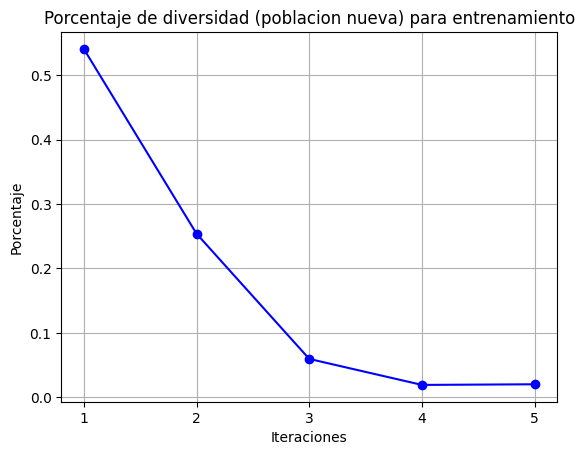

In [17]:
import matplotlib.pyplot as plt

plt.plot(train_index, train_result, marker='o', linestyle='-', color='b')

# Añadir título y etiquetas
plt.title('Porcentaje de diversidad (poblacion nueva) para entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Porcentaje')
plt.xticks(train_index)


# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [18]:
front = get_non_dominated_solutions(algorithm.get_result())


In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
referenceFront = np.loadtxt("resources/reference_front/ZDT1.pf", delimiter=' ')
referenceFront = referenceFront[referenceFront[:, 0].argsort()]

In [21]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

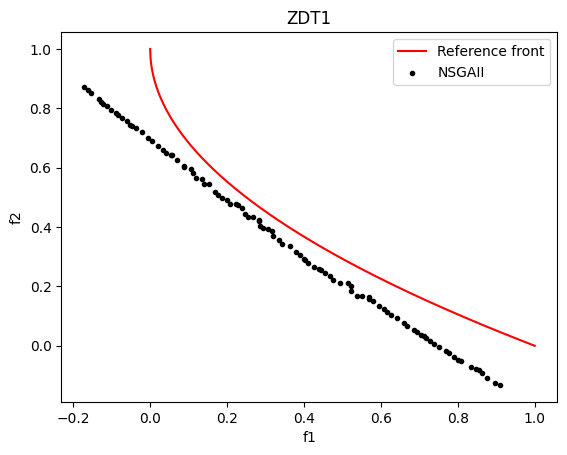

In [22]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="red")

plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front","NSGAII"])

In [23]:

problem = ZDT1() 
#"Ejecutar entre 10 y 25 veces independientes"

max_evaluations = 50000
algorithm = NSGAII(
        problem=problem,
        population_size=100,
        offspring_population_size=100,
        mutation=PolynomialMutation(probability=probability, distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations),
)

algorithm.run()

In [24]:
algorithm.get_diversity()

[[5000, 2647], [5000, 1379], [5000, 1311], [5000, 1266], [5000, 1293]]

In [ ]:
front = get_non_dominated_solutions(algorithm.get_result())

In [ ]:
objectives = [solution.objectives for solution in front]

x = [_[0] for _ in objectives]
y = [_[1] for _ in objectives]

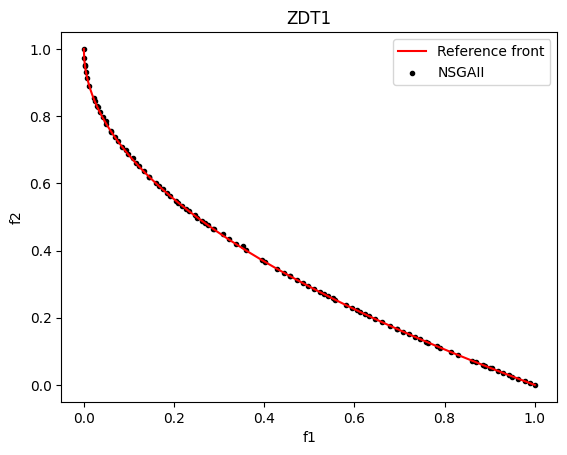

In [ ]:
plt.plot(referenceFront[:,0], referenceFront[:,1], color="red")
plt.scatter(x, y, color="black", marker = '.')

plt.xlabel("f1")
plt.ylabel("f2")
plt.title(problem.name())
plt.legend(["Reference front","NSGAII"])

In [1]:
from jmetal.operator import PolynomialMutation, SBXCrossover
from jmetal.util.solution import get_non_dominated_solutions
from jmetal.util.termination_criterion import StoppingByEvaluations
from modnsgaii import S_NSGAII, NSGAII

from jmetal.problem import DTLZ1, DTLZ2

from surrogate_models.regressor_chain_surrogate import RegressorChainSurrogate
from surrogate_models.multioutput_learning_surrogate import MultiOutputLearnerSurrogate

problem = DTLZ2()
#probability = 1.0 / problem.number_of_variables()
probability = 0.95

max_evaluations = 50000
algorithm = NSGAII(
        problem=problem,
        population_size=1000,
        offspring_population_size=1000,
        mutation=PolynomialMutation(probability=probability, distribution_index=20),
        crossover=SBXCrossover(probability=1.0, distribution_index=20),
        termination_criterion=StoppingByEvaluations(max_evaluations=max_evaluations)
)

algorithm.run()

In [2]:
res = algorithm.get_result()

for solution in res:
    print(solution.objectives)

[0.00035001481244289643, 1.0378040117331826e-19, 1.2785620145737346]
[6.3157793582719205e-21, 2.6345678402850727e-14, 1.0958166530072078]
[1.0035960119373701, 0.21445896943686907, 8.900535141660337e-17]
[0.0009177948521654526, 1.1744692334992066, 1.0185983419882306e-16]
[1.2372965245350414, 0.0, 0.0023537624166287525]
[0.04145695422028596, 0.0, 1.2074343378995174]
[0.0064941382242733854, 1.9255307096468306e-18, 1.1733082074880574]
[1.1579026527425604, 3.107130416348017e-05, 2.927451541976696e-15]
[1.4930515963172841e-18, 6.782851488180814e-17, 1.107992044375666]
[0.0003868242682275583, 1.463886690371391e-18, 1.2437017948979912]
[0.006963841664978062, 1.0873314041173034, 9.430441515309526e-17]
[0.03438021652961901, 1.0681951095828117, 9.269079321058101e-17]
[6.782620049797959e-17, 1.1076859147503237, 0.0838128560684127]
[1.114542668096781, 1.3041512650728717e-10, 0.00032770374422236547]
[1.1341952331439067, 2.169818766078127e-08, 7.646496341511288e-08]
[1.0741379081170597, 2.19171087320

In [ ]:
referenceFront = np.loadtxt("resources/reference_front/DTLZ1.3D.pf", delimiter='\t')
referenceFront = referenceFront[referenceFront[:, 0].argsort()]

NameError: name 'np' is not defined